# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import config
from scipy.stats import mannwhitneyu

# Set constants

In [2]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (20, 6)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "violin.svg"

# Import data

In [3]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])
GMHI2_scores = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI2_scores_training_set.csv"), index_col=[0, 1])
GMHI_scores = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI_scores_training_set.csv"), index_col=[0, 1])
display(X.head())
display(y.head())
display(GMHI2_scores.head())
display(GMHI_scores.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-10  SAMN03283239        0.000000                     0.000000   
         SAMN03283266        0.000000                     0.000000   
         SAMN03283281        0.009764                     0.009764   
         SAMN03283245        0.106067                     0.106067   
         SAMN03283294        0.000000                     0.000000   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-10  SAMN03283239                                            0.000000   
         SAMN03283266                                            0.000000   
         SAMN03283281                                            0.009764   
         SAMN03283245                                            0.106067   
         SAMN03283294                                            0.000000   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-10  SAMN03283239                                               0.000000                      
         SAMN03283266                                               0.000000                      
         SAMN03283281                                               0.009764                      
         SAMN03283245                                               0.106067                      
         SAMN03283294                                               0.000000                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-10  SAMN03283239                                               0.000000                                             
         SAMN03283266                                               0.000000                                             
         SAMN03283281                                               0.009764                                             
         SAMN03283245                                               0.106067                                             
         SAMN03283294                                               0.000000                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-10  SAMN03283239                                               0.000000                                                                   
         SAMN03283266                                               0.000000                                                                   
         SAMN03283281                                               0.009764                                                                   
         SAMN03283245                                               0.072453                                                                   
         SAMN03283294                                               0.000000                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-10  SAMN03283239                                               0.000000              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283245                              True
         SAMN03283294                              True

GMHI2
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.911264
         SAMN03283266      0.292261
         SAMN03283281      1.012555
         SAMN03283245      1.193557
         SAMN03283294      2.163656

GMHI
Study_ID Sample Accession          
GMHI-10  SAMN03283239      3.847288
         SAMN03283266      1.769726
         SAMN03283281      3.365736
         SAMN03283245      4.346680
         SAMN03283294      1.407946

# Compute other ecological indices for comparisons

## Compute Richness

In [4]:
X_species = X[list(filter(lambda x : "s__" in x, X.columns))]
richness = pd.DataFrame((X_species > config.PRESENCE_CUTOFF).sum(axis=1), columns=["Species Richness"])
richness

Species Richness
Study_ID Sample Accession                  
GMHI-10  SAMN03283239                    51
         SAMN03283266                    76
         SAMN03283281                    74
         SAMN03283245                    56
         SAMN03283294                    94
...                                     ...
P98      SAMEA6104852                   121
         SAMEA6104851                   107
         SAMEA6104850                   112
         SAMEA6104885                    78
         SAMEA6104858                    96

[8869 rows x 1 columns]

## Compute Shannon Diversity

In [5]:
shannon = pd.DataFrame(np.sum((-X_species * np.log(X_species)).fillna(0), axis=1), columns=["Shannon Diversity"])
shannon

Shannon Diversity
Study_ID Sample Accession                   
GMHI-10  SAMN03283239               2.429760
         SAMN03283266               2.711069
         SAMN03283281               2.885216
         SAMN03283245               3.091093
         SAMN03283294               2.533818
...                                      ...
P98      SAMEA6104852               3.572250
         SAMEA6104851               2.985028
         SAMEA6104850               3.421072
         SAMEA6104885               2.803084
         SAMEA6104858               2.653275

[8869 rows x 1 columns]

## Compute Simpsons Diversity

In [6]:
simpson = pd.DataFrame(np.sum(X_species ** 2, axis=1), columns=["Simpson Diversity"])
simpson

Simpson Diversity
Study_ID Sample Accession                   
GMHI-10  SAMN03283239               0.196903
         SAMN03283266               0.119524
         SAMN03283281               0.096525
         SAMN03283245               0.067481
         SAMN03283294               0.158091
...                                      ...
P98      SAMEA6104852               0.039692
         SAMEA6104851               0.082052
         SAMEA6104850               0.050006
         SAMEA6104885               0.079272
         SAMEA6104858               0.135305

[8869 rows x 1 columns]

# Aggregate data and plot!

In [7]:
num_healthy = y.values.sum()
num_nonhealthy = y.shape[0] - y.values.sum()
num_healthy, num_nonhealthy

(5757, 3112)

In [8]:
healthy_nonhealthy = y.copy()
healthy_nonhealthy.columns = ["Health status"]
healthy_text = f"Healthy\n ({num_healthy})"
nonhealthy_text = f"Nonhealthy\n ({num_nonhealthy})"
healthy_nonhealthy[y.values] = healthy_text
healthy_nonhealthy[~y.values] = nonhealthy_text

data = pd.concat([GMHI2_scores, GMHI_scores, healthy_nonhealthy, richness, shannon, simpson], axis=1)
data

GMHI2      GMHI     Health status  \
Study_ID Sample Accession                                         
GMHI-10  SAMN03283239      1.911264  3.847288  Healthy\n (5757)   
         SAMN03283266      0.292261  1.769726  Healthy\n (5757)   
         SAMN03283281      1.012555  3.365736  Healthy\n (5757)   
         SAMN03283245      1.193557  4.346680  Healthy\n (5757)   
         SAMN03283294      2.163656  1.407946  Healthy\n (5757)   
...                             ...       ...               ...   
P98      SAMEA6104852      0.684386  1.890616  Healthy\n (5757)   
         SAMEA6104851     -0.797367  0.519115  Healthy\n (5757)   
         SAMEA6104850      1.058772  1.548641  Healthy\n (5757)   
         SAMEA6104885      0.196350 -0.087274  Healthy\n (5757)   
         SAMEA6104858      1.055208  1.562640  Healthy\n (5757)   

                           Species Richness  Shannon Diversity  \
Study_ID Sample Accession                                        
GMHI-10  SAMN03283239                    51           2.429760   
         SAMN03283266                    76           2.711069   
         SAMN03283281                    74           2.885216   
         SAMN03283245                    56           3.091093   
         SAMN03283294                    94           2.533818   
...                                     ...                ...   
P98      SAMEA6104852                   121           3.572250   
         SAMEA6104851                   107           2.985028   
         SAMEA6104850                   112           3.421072   
         SAMEA6104885                    78           2.803084   
         SAMEA6104858                    96           2.653275   

                           Simpson Diversity  
Study_ID Sample Accession                     
GMHI-10  SAMN03283239               0.196903  
         SAMN03283266               0.119524  
         SAMN03283281               0.096525  
         SAMN03283245               0.067481  
         SAMN03283294               0.158091  
...                                      ...  
P98      SAMEA6104852               0.039692  
         SAMEA6104851               0.082052  
         SAMEA6104850               0.050006  
         SAMEA6104885               0.079272  
         SAMEA6104858               0.135305  

[8869 rows x 6 columns]

In [9]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

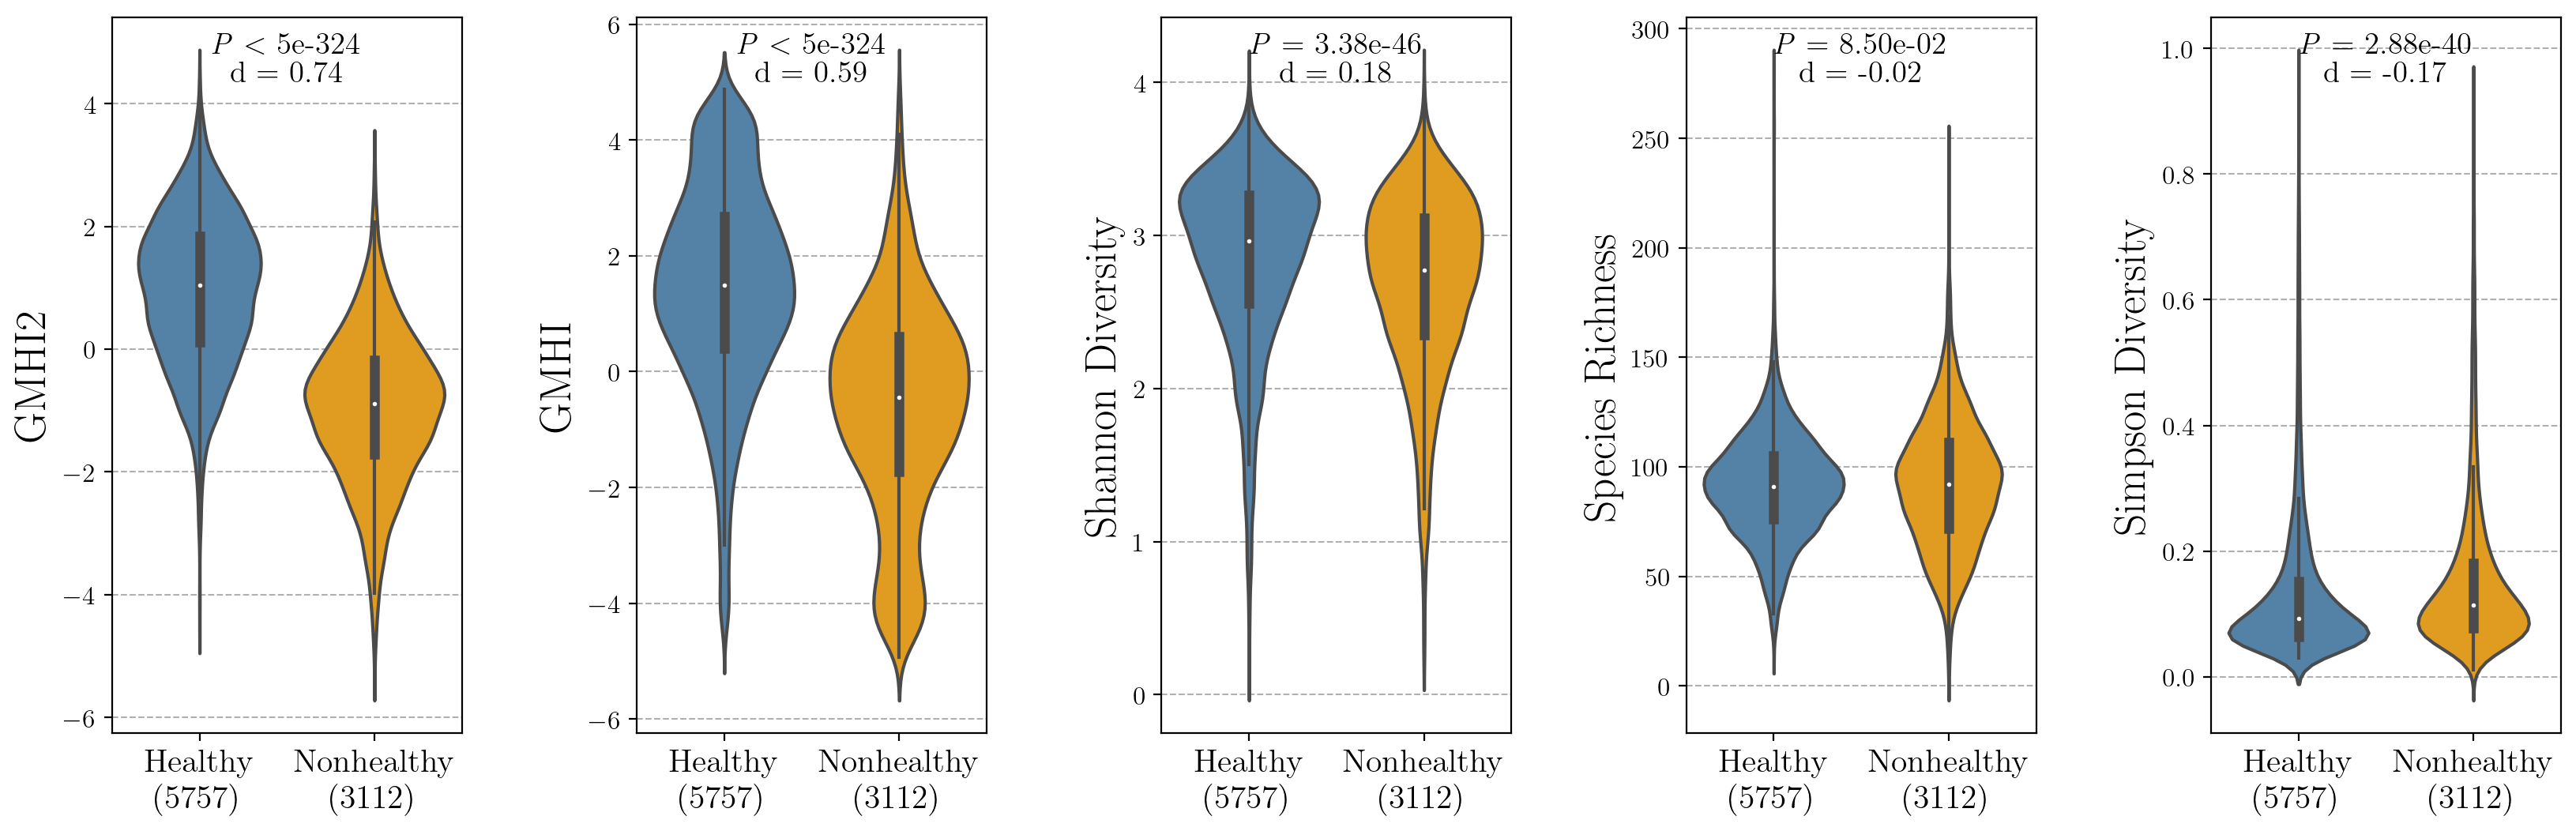

In [10]:
fig, axs = plt.subplots(ncols=5, figsize=figsize, dpi=dpi)
indices = ["GMHI2", "GMHI", "Shannon Diversity","Species Richness", "Simpson Diversity"]
for ind, ax in zip(indices, axs):
    v = sns.violinplot(x="Health status", y=ind, data=data, ax=ax, 
                   palette={healthy_text : healthy_color, nonhealthy_text : nonhealthy_color})
    cliffs_delta, man_whitney_u_p_val = observeDifference(data[ind].iloc[y.values], data[ind].iloc[~y.values])
    
    p_text = (r"\textit{P} $<$ " + str(np.nextafter(0, 1))) if man_whitney_u_p_val == 0 else (
        r"\textit{P} = " + str(np.format_float_scientific(man_whitney_u_p_val, precision=2))
    )
    
    ax.text(0.5, 0.95, p_text, fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.91, f"d = {'%.2f' % cliffs_delta}", fontsize=14,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(axis="y", labelsize=12)
    v.tick_params(axis="x", labelsize=15)
    ax.yaxis.label.set_size(20)
    ax.set_axisbelow(True)
    ax.grid(linestyle = '--', axis="y", linewidth = 0.75)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(config.FIGURE_DIR, filename))